The COVID-19 pandemic was an event that impacted not only people's lives directly, but disease surveillance processes as well. This project analyzed how the dispensation of naloxone was impacted during the pandemic years of 2020 and 2021. My prediction for this data was that the naloxone dispensation rates would be negatively impacted by vaccination efforts, leading the rates to decrease between 2020 and 2021. I used data from the CDC Overdose Prevention website, downloaded from this link: https://www.cdc.gov/overdose-prevention/data-research/facts-stats/naloxone-dispensing-rate-maps.html. After loading the required package, tidyverse, and assigning the data to a variable, the first order of business was to prep the data by filtering the data to only rows from the year 2020 and 2021 and displaying only certain columns using the rename, filter, select, and arrange functions from the dplyr package included in tidyverse. Before making visualizations of this data, it was important to see how many states would need to be visualized for each visualization, one for the states with negative differences in rates between years and one for positive differences. To identify those states, the pivot_wider function was used to turn the year column into two columns, one for the 2020 rates for each state, and one for the 2021 rates. A new column for the difference between rates for the two years was then calculated by subtracting the 2021 rates from the 2020 rates. This data was then tabularized using the head function, and five states were identified with having negative differences between 2020 and 2021 and 24 states were identified with having positive differences between the two years.

In [1]:
library(tidyverse)

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
naloxone = read_csv('State Naloxone Dispensing Rates.csv')

Rows: 88560 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Date, date_type, Location
dbl (26): MMWR_week, Administered_Daily, Administered_Cumulative, Administer...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 255 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): STATE_NAME, STATE_ABBREV, STATE_FIPS, Naloxone Dispensing Rate (per...
dbl (2): YEAR, naloxone_dispensing_rate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [74]:
naloxone_pre_post = naloxone |>
    rename(Location = STATE_ABBREV) |>
    filter(YEAR %in% c("2020","2021")) |>
    select(YEAR, STATE_NAME, Location, naloxone_dispensing_rate) |>
    arrange(Location)

naloxone_pre_post |> head()




YEAR,STATE_NAME,Location,naloxone_dispensing_rate
<dbl>,<chr>,<chr>,<dbl>
2020,Alaska,AK,0.2
2021,Alaska,AK,0.2
2020,Alabama,AL,0.2
2021,Alabama,AL,0.3
2020,Arkansas,AR,0.2
2021,Arkansas,AR,0.8


In [80]:
pivot  = naloxone_pre_post |>
    pivot_wider(names_from = YEAR, values_from = naloxone_dispensing_rate,
               names_prefix = "rate")


pivot_diff = pivot |>
    mutate(difference = rate2021 - rate2020)
pivot_diff |> head()

biggest_neg_diff = pivot_diff |>
    filter(difference < 0) |>
    arrange(difference) |>
    slice_head(n = 10)

biggest_neg_diff
nrow(biggest_neg_diff)

biggest_pos_diff = pivot_diff |>
    filter(difference > 0) |>
    arrange(-difference) |>
    slice_head(n = 10)

biggest_pos_diff

rows_pos_diff = pivot_diff |>
    filter(difference > 0) |>
    arrange(-difference)

nrow(rows_pos_diff)

STATE_NAME,Location,rate2020,rate2021,difference
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Alaska,AK,0.2,0.2,0.0
Alabama,AL,0.2,0.3,0.1
Arkansas,AR,0.2,0.8,0.6
Arizona,AZ,0.5,0.6,0.1
California,CA,0.4,0.4,0.0
Colorado,CO,0.2,0.3,0.1


STATE_NAME,Location,rate2020,rate2021,difference
<chr>,<chr>,<dbl>,<dbl>,<dbl>
New Mexico,NM,1.3,1.2,-0.1
New Jersey,NJ,0.4,0.3,-0.1
Vermont,VT,0.4,0.3,-0.1
District of Columbia,DC,0.9,0.8,-0.1
Maryland,MD,0.7,0.6,-0.1


[1] 5

STATE_NAME,Location,rate2020,rate2021,difference
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Wyoming,WY,0.3,1.0,0.7
Arkansas,AR,0.2,0.8,0.6
South Carolina,SC,0.2,0.7,0.5
Kentucky,KY,0.4,0.7,0.3
West Virginia,WV,0.5,0.7,0.2
Indiana,IN,0.3,0.4,0.1
Missouri,MO,0.3,0.4,0.1
Oklahoma,OK,0.3,0.4,0.1
Oregon,OR,0.3,0.4,0.1


[1] 24

With the states identified for visualization, it was time to the charts. Overlapped bar charts were used for this scenario as it was the cleanest way to visualize the differences. Since there only five states/territories that had negative differences: New Mexico, New Jersey, Washington DC, Maryland, and Vermont; all five states were visualized. The prepped, pre-pivot dataset was used and filtered for those five states. The year column had to mutated into a factor data type as it was numeric originally and therefore could not be used correctly as a fill variable. This new dataset was then plotted using the ggplot function and geom_col. To display overlapped bars for each state instead of stacked bars, the position = "identity" argument was used for the geom_col function. A title, and axis labels were added and the title was centered and text wrapped so it would be fully displayed. The bar chart for the states with the positive differences needed more work. To start, there were 24 states with positive differences so the top six states were chosen to be visualizied: Wyoming, Arkansas, South Carolina, Kentucky, West Virginia, and Indiana. Six states were chosen because the state with the smallest difference, Indiana, shared the same value as the other 18, so it would be representative of them. Next, the geom_col function was displaying the 2021 rates in front of the 2020 rates, so it was necessary to manually change this by using the geom_col function twice, once for each year. The legend was not displaying, so one was manually added and colors manipulated using the scale_fill_manual function. Finally, a title and axis names were added. The visualizations and the tables above show that contrary to my prediction, most states actually had increased rates naloxone dispensation in 2021 compared to 2020, and the magnitude of dispensation in positive differences was much greater than the magnitude in states with negative differences. 

YEAR,STATE_NAME,Location,naloxone_dispensing_rate
<fct>,<chr>,<chr>,<dbl>
2020,District of Columbia,DC,0.9
2021,District of Columbia,DC,0.8
2020,Maryland,MD,0.7
2021,Maryland,MD,0.6
2020,New Jersey,NJ,0.4
2021,New Jersey,NJ,0.3
2020,New Mexico,NM,1.3
2021,New Mexico,NM,1.2
2020,Vermont,VT,0.4


YEAR,STATE_NAME,Location,naloxone_dispensing_rate
<fct>,<chr>,<chr>,<dbl>
2020,Arkansas,AR,0.2
2021,Arkansas,AR,0.8
2020,Indiana,IN,0.3
2021,Indiana,IN,0.4
2020,Kentucky,KY,0.4
2021,Kentucky,KY,0.7
2020,South Carolina,SC,0.2
2021,South Carolina,SC,0.7
2020,West Virginia,WV,0.5


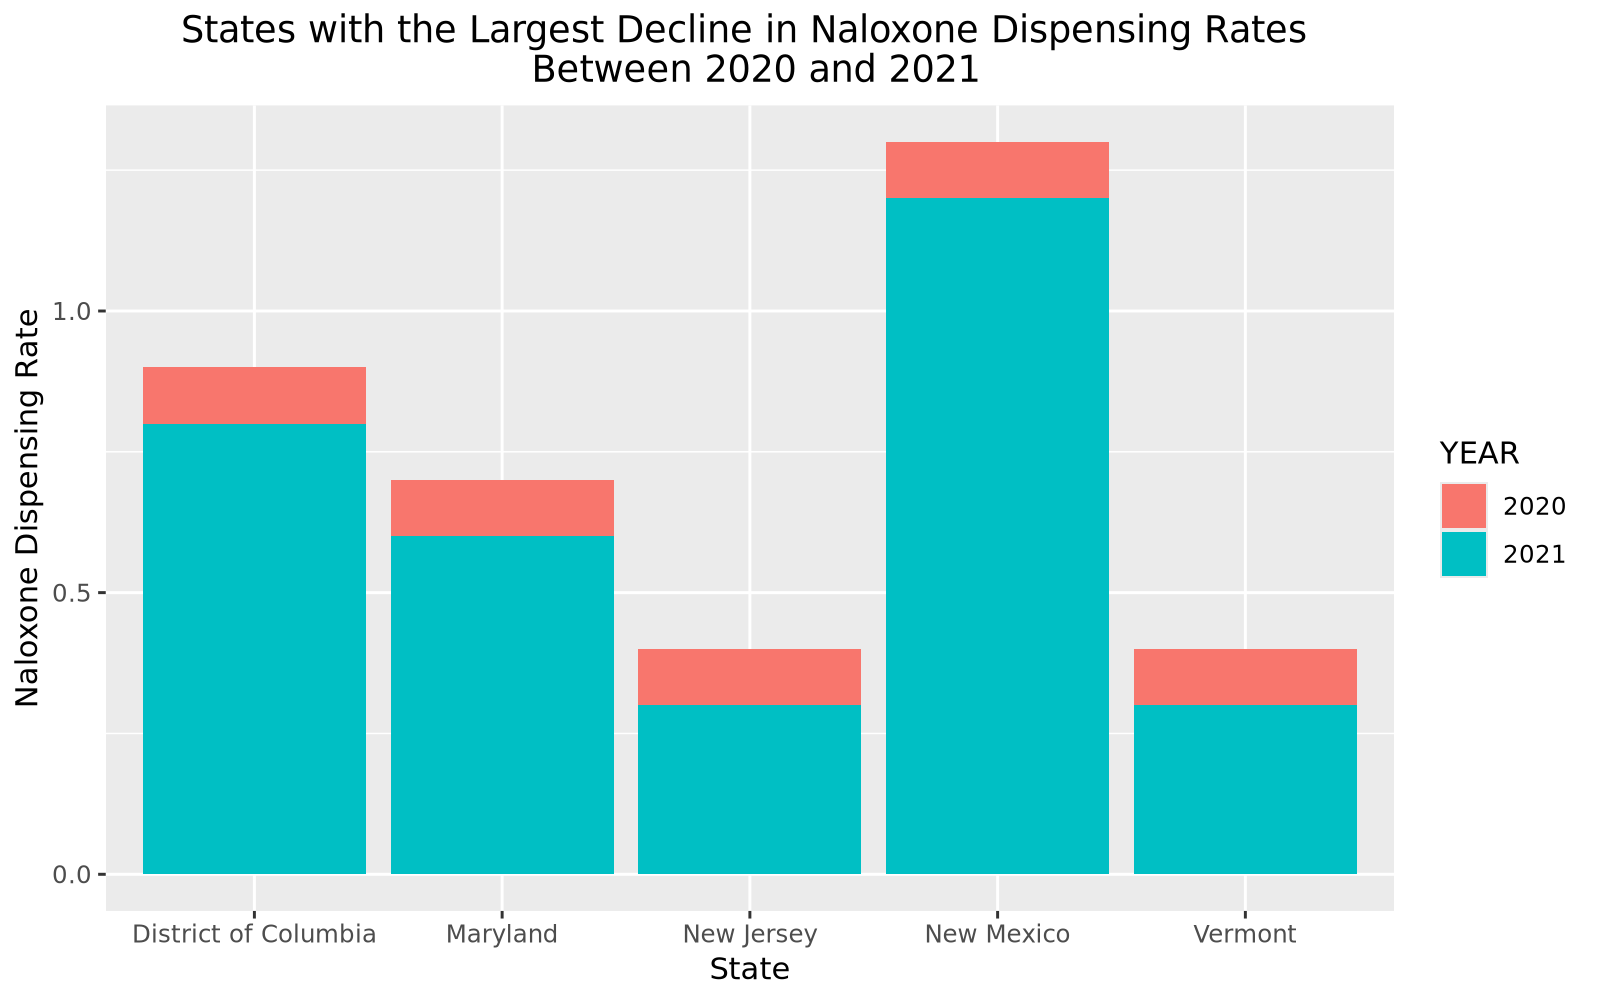

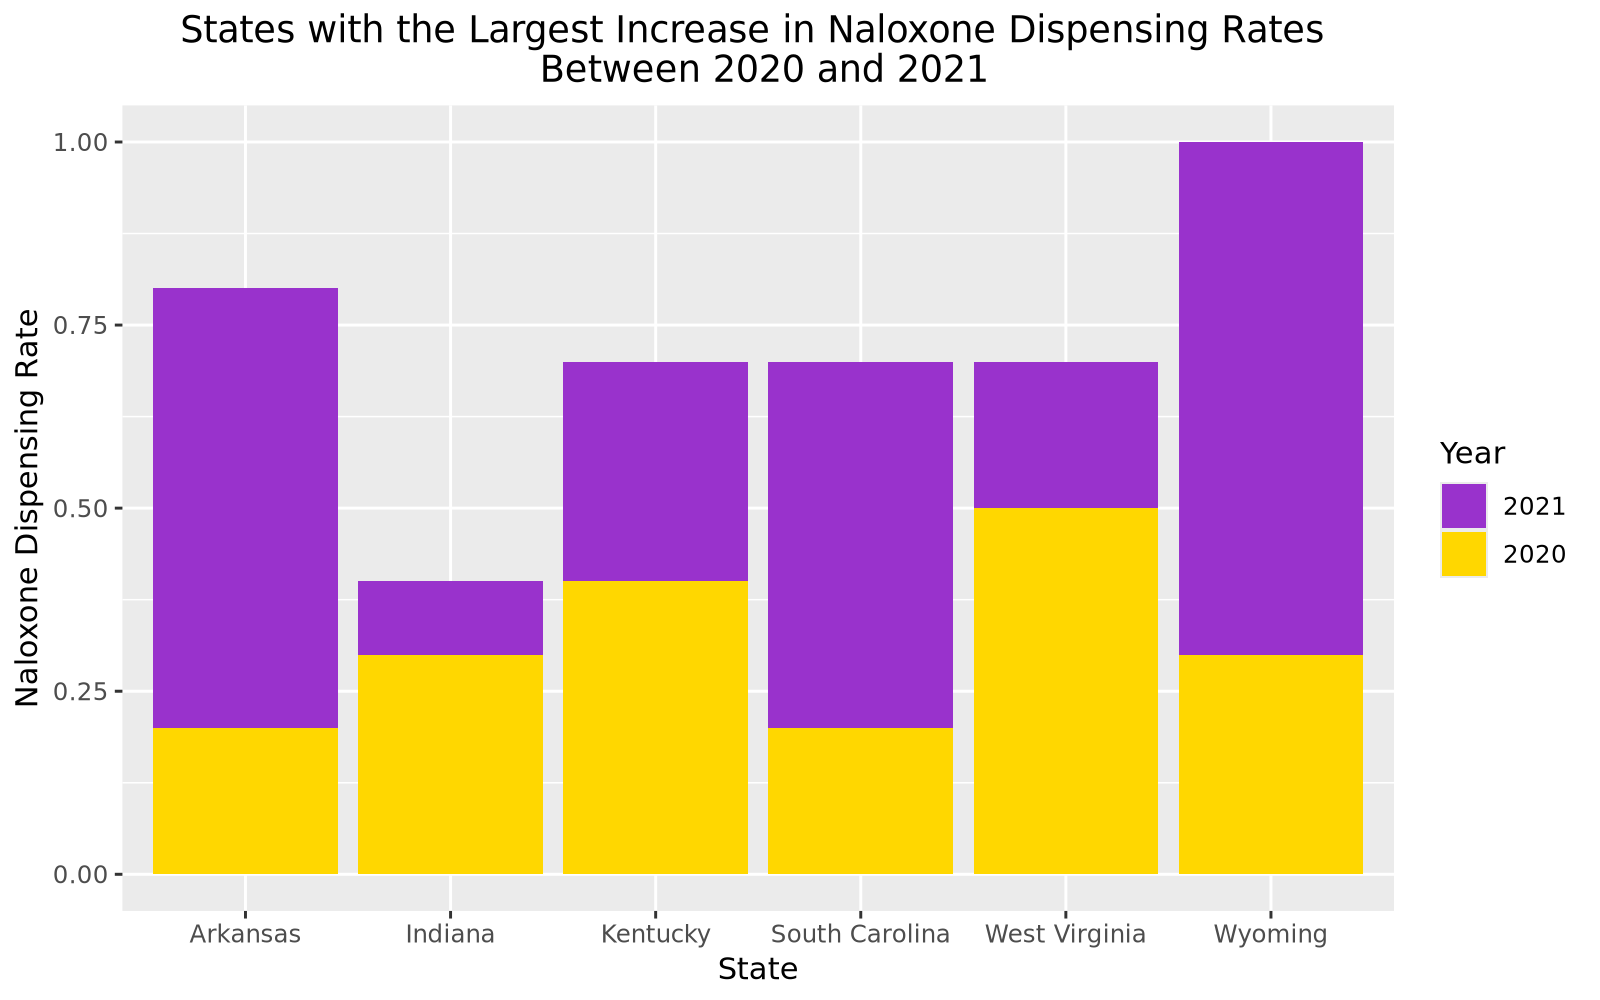

In [83]:
options(repr.plot.res = 200, repr.plot.height = 5, repr.plot.width = 8) 

naloxone_neg_diff = naloxone_pre_post |>
    filter(Location %in% c("NM", "NJ", "DC", "MD", "VT")) |>
    mutate(YEAR = as.factor(YEAR))
    



neg_diff_bar = ggplot(naloxone_neg_diff, aes(x = STATE_NAME, y = naloxone_dispensing_rate, fill = YEAR)) +
    geom_col(position = "identity") +
    labs(title = "States with the Largest Decline in Naloxone Dispensing Rates \n Between 2020 and 2021",
         x = "State",
         y = "Naloxone Dispensing Rate") +
    theme(plot.title = element_text(hjust = 0.5))  
neg_diff_bar







naloxone_pos_diff = naloxone_pre_post |>
    filter(Location %in% c("WY", "AR", "SC", "KY", "WV","IN")) |>
    mutate(YEAR = as.factor(YEAR))
    





pos_diff_bar <- ggplot(data = naloxone_pos_diff, aes(x = STATE_NAME, y = naloxone_dispensing_rate, fill = YEAR)) +
  geom_col(data = naloxone_pos_diff[naloxone_pos_diff$YEAR == "2021", ], position = "identity") +
  geom_col(data = naloxone_pos_diff[naloxone_pos_diff$YEAR == "2020", ], position = "identity") +
  scale_fill_manual(
    values = c("2020" = "gold", "2021" = "darkorchid"),
    name = "Year") +
  labs(
    title = "States with the Largest Increase in Naloxone Dispensing Rates \n Between 2020 and 2021",
    x = "State",
    y = "Naloxone Dispensing Rate") +
  theme(plot.title = element_text(hjust = 0.5))

pos_diff_bar